In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
from art.classifiers import KerasClassifier
from art.attacks import FastGradientMethod, CarliniLInfMethod

In [2]:
if tf.__version__[0] != '2':
    raise ImportError('This notebook requires Tensorflow v2.')

# Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_test = x_test[0:100]
y_test = y_test[0:100]

# Tensorflow with Keras API

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=1);

Train on 60000 samples
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2931 - accuracy: 0.9144


In [6]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy_test)

100/100 [==============================] - 0s 231us/sample - loss: 0.0788 - accuracy: 0.9700
Test accuracy: 0.97


In [7]:
classifier = KerasClassifier(model=model, clip_values=(0, 1))

In [8]:
attack_fgsm = FastGradientMethod(classifier=classifier, eps=0.3)

In [9]:
x_test_adv = attack_fgsm.generate(x_test)

In [10]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
l_inf_distance = np.mean(np.abs((x_test_adv - x_test)))
print('Test accuracy: {:4.2f}'.format(accuracy_test))
print('L_Inf average distance: {:4.2f}'.format(l_inf_distance))

100/100 [==============================] - 0s 44us/sample - loss: 11.6541 - accuracy: 0.0300
Test accuracy: 0.03
L_Inf average distance: 0.18


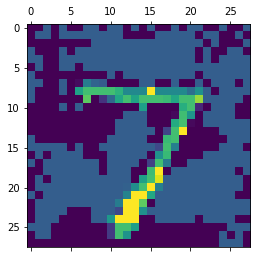

In [11]:
plt.matshow(x_test_adv[0])
plt.show()

In [12]:
attack_cw = CarliniLInfMethod(classifier=classifier, eps=0.3, max_iter=100, learning_rate=0.01)

In [13]:
x_test_adv = attack_cw.generate(x_test)

In [14]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
l_inf_distance = np.mean(np.abs((x_test_adv - x_test)))
print('Test accuracy: {:4.2f}'.format(accuracy_test))
print('L_Inf average distance: {:4.2f}'.format(l_inf_distance))

100/100 [==============================] - 0s 59us/sample - loss: 1.9551 - accuracy: 0.1700
Test accuracy: 0.17
L_Inf average distance: 0.03


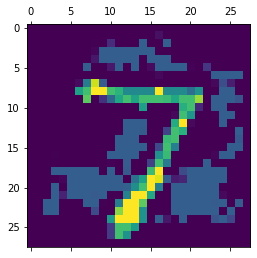

In [15]:
plt.matshow(x_test_adv[0, :, :])
plt.show()